# **Schneider Electric Challenge**
---
*    Data Analytics for Application class
*    WiSe 22/23 - TUM
*    Prepared and developed by Aris Dressino, ...

In [31]:
# basic libraries needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import copy
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set(rc={'figure.figsize':(20,10)})
tf.random.set_seed(42)

In [2]:
# colab package for file reading
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading files from Google Drive
data_hor_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_hor_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Horizontalsetup.xlsx", sheet_name = "Sheet1")
data_ver_disc = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/DiscreteMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")
data_ver_cont = pd.read_excel("/content/drive/MyDrive/Schneider_Electric/schneider_electric_data/ContinuousMotion_Data_Verticalsetup.xlsx", sheet_name = "Tabelle1")
# use this in local environment
# data_hor_disc = pd.read_excel("path/", sheet_name="name")

## **exploratory data analysis and visualization**
---

1.   Summary statistics and head
2.   Visualization of continuous and discrete patterns per selected rotations per minute (RPM)
3. ... add something guys



In [4]:
# header of discrete horizontal data
data_hor_disc.head(5)

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
0,0.846,0.044,0.014,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
1,0.846,0.044,0.167,0.255,4.009,0.516,5.616,7.860,9.240,9.974999,10.981999,6.578000,12.059999,7.950,12.599,9.990001,9.555000,19.096001,13.938000,0.202
2,0.846,0.044,0.167,0.255,4.009,5.676,5.400,6.930,9.240,9.974999,9.728000,6.578000,11.834999,7.830,12.599,9.990001,10.465000,13.454000,11.039999,0.564
3,0.774,0.147,0.167,4.080,4.199,5.676,5.400,6.930,7.854,8.014999,9.728000,6.578000,11.834999,7.830,7.267,9.287000,10.465000,13.454000,11.039999,0.564
4,0.774,0.147,2.171,4.080,4.199,5.676,5.400,6.468,7.854,8.014999,9.472000,10.372999,11.834999,12.267,7.267,9.287000,15.548001,13.454000,11.280000,10.434


In [5]:
# descriptive statistics of discrete table
data_hor_disc.describe()
# as expected, we register increasing mean and standard deviation along with increased RPM

,Pow_100,Pow_200,Pow_300,Pow_400,Pow_500,Pow_600,Pow_700,Pow_800,Pow_900,Pow_1000,Pow_1100,Pow_1200,Pow_1300,Pow_1400,Pow_1500,Pow_1600,Pow_1700,Pow_1800,Pow_1900,Pow_2000
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,0.843142,1.249023,1.604354,1.951205,2.206332,2.493221,2.730921,2.848026,3.118614,3.295054,3.453644,3.577217,3.732571,3.902852,3.908951,4.052579,4.156900,4.182729,4.218840,4.217175
std,0.253721,0.579047,0.920542,1.298846,1.663406,2.058099,2.446147,2.785256,3.201309,3.574365,3.955490,4.300227,4.628946,5.014324,5.244952,5.600147,5.836061,5.949107,6.142617,6.150047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.834000,1.332000,0.531000,0.294000,0.264000,0.265500,0.264000,0.244000,0.258000,0.264000,0.264000,0.238000,0.234000,0.256000,0.243000,0.255000,0.273000,0.256000,0.255000,0.270000
50%,0.900000,1.458000,2.040000,2.625000,3.204000,3.738000,2.873000,1.220000,0.828000,0.735000,0.606000,0.516000,0.458000,0.417000,0.486000,0.434500,0.426000,0.405000,0.417000,0.447000
75%,0.960000,1.575000,2.210000,2.896000,3.553000,4.242000,4.950000,5.655000,6.498750,7.310000,8.103001,8.639999,8.649000,8.613000,7.670001,7.525000,7.524000,7.560000,7.232000,7.175000
max,1.316000,2.360000,3.528000,5.100000,6.380000,7.608000,9.099999,9.641000,10.642000,11.375999,12.558001,13.631000,14.899000,16.224001,17.237999,19.139999,20.235001,22.019999,23.808001,23.487999


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Watts consumed per RPM in discrete motion')]

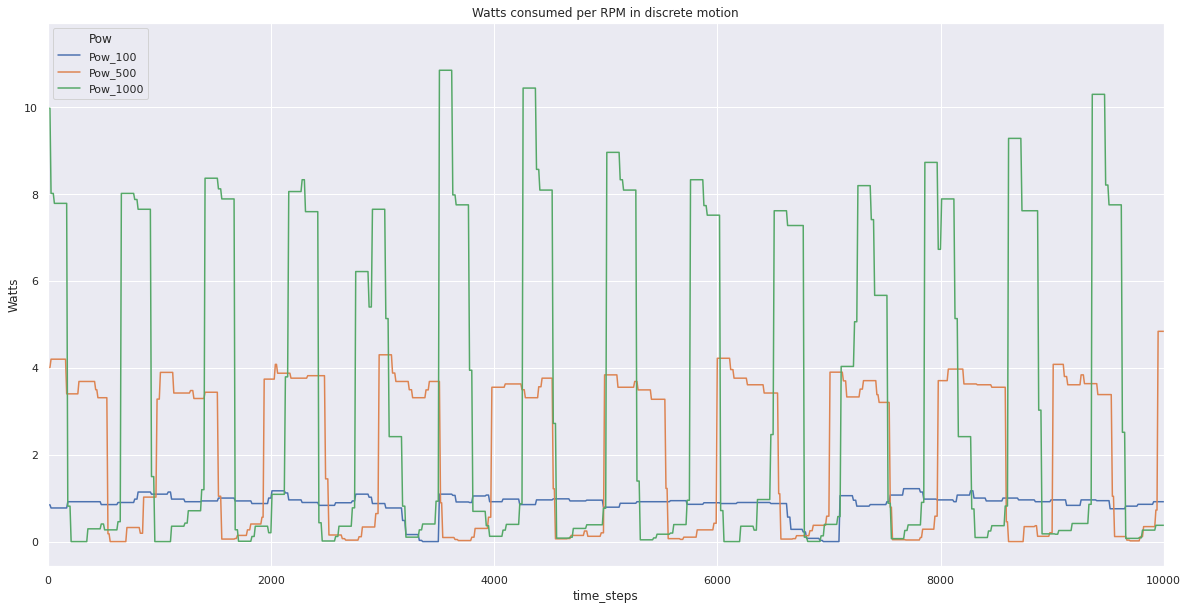

In [6]:
#add timesteps in ms for discrete tables
data_hor_disc['time_steps'] = range(0, 10*len(data_hor_disc), 10)
#data_hor_disc.head(10)
#plot melted table for discrete values
reference_pow=["Pow_100","Pow_500","Pow_1000"]
line_hor_disc = sns.lineplot("time_steps", "Watts", hue="Pow", hue_order=reference_pow,
             data=data_hor_disc.melt("time_steps", var_name="Pow", value_name="Watts"))
line_hor_disc.set_xlim(0,10000)
line_hor_disc.set(title='Watts consumed per RPM in discrete motion')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Watts consumed per RPM in continuous motion')]

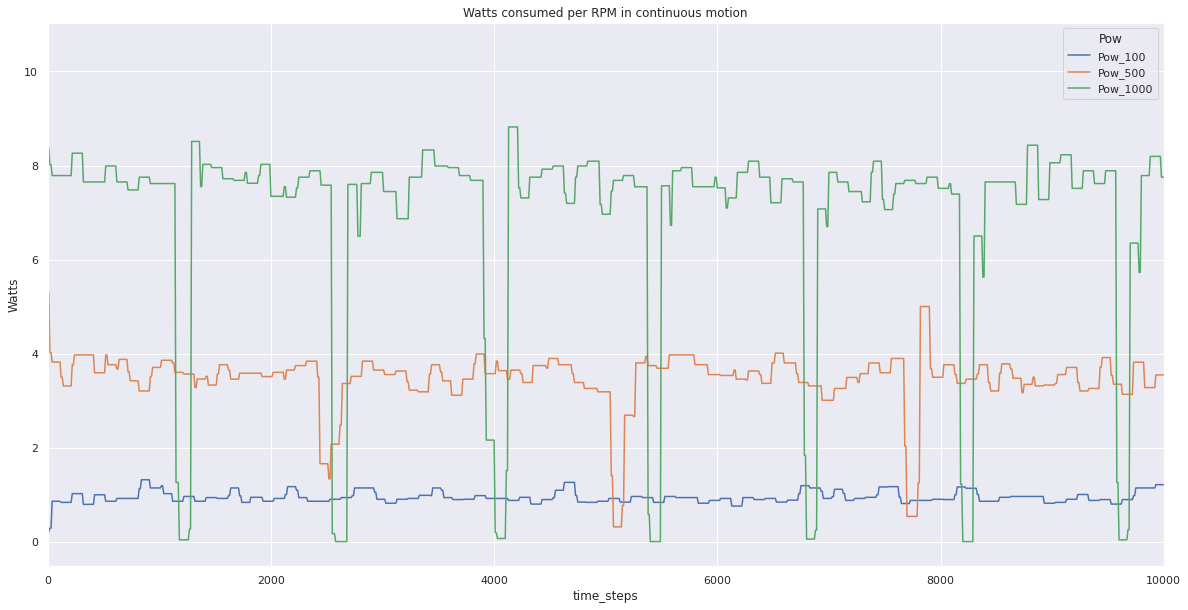

In [7]:
#add timesteps in ms to continuous table
data_hor_cont['time_steps'] = range(0, 10*len(data_hor_cont), 10)
#data_hor_cont.head(10)
#plot melted table for continuous values
reference_pow=["Pow_100","Pow_500","Pow_1000"]
line_hor_cont = sns.lineplot("time_steps", "Watts", hue="Pow", hue_order=reference_pow,
             data=data_hor_cont.melt("time_steps", var_name="Pow", value_name="Watts"))

#time_steps\PoW\watts
#(10-45000)x20\RPM_100 to RPM_2000->1-20\ x to x_2000

line_hor_cont.set_xlim(0,10000)
line_hor_cont.set(title='Watts consumed per RPM in continuous motion')

In [8]:
#to be deleted
#sns.lineplot(data = data_hor_disc, x = data_hor_disc.index, y="Pow_100").set(title = "Power Consumption Horizontal Discrete")

In [9]:
#to be deleted
#sns.lineplot(data = data_hor_cont, x = data_hor_cont.index, y = "Pow_100").set(title = "Power Consumption Horizontal Continuous")

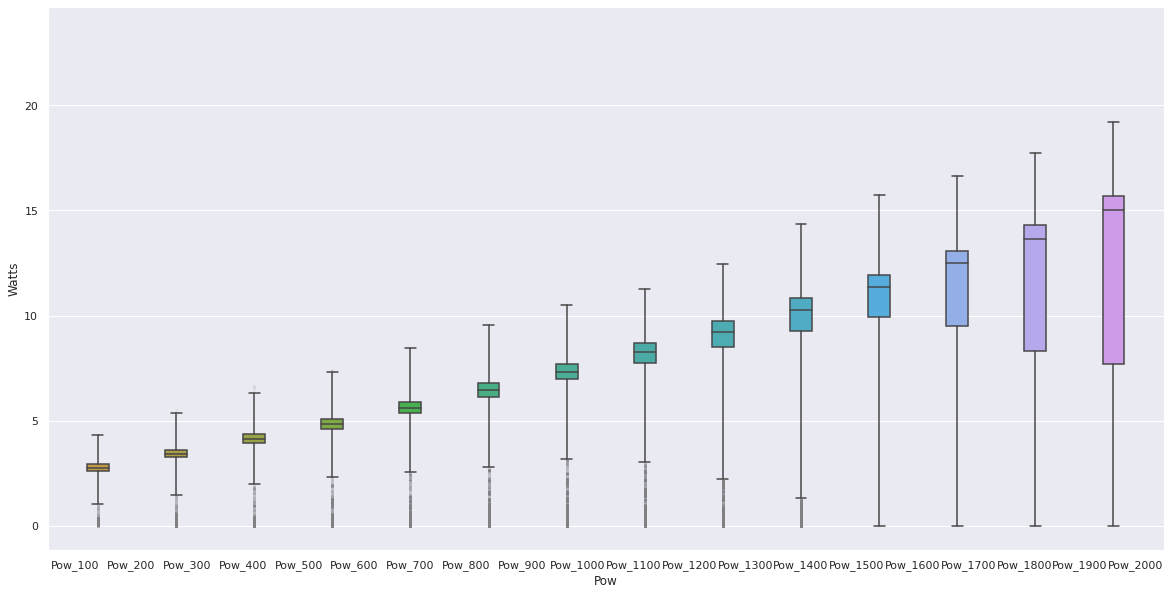

In [10]:
# boxplots of RPM distributions per RPM category
# increasing mean and variance are observable in our data

flierprops = dict(marker='x', markerfacecolor='None', markersize=2,  markeredgecolor='grey', alpha=0.01)
bp = sns.boxplot(x="Pow", y="Watts", hue="Pow", width=8, whis=5, flierprops=flierprops, data=data_hor_cont.melt("time_steps", var_name="Pow", value_name="Watts")) 
bp.legend([],[], frameon=False)


[Text(0, 0.5, 'Range of Power Consumption'),
 Text(0.5, 0, 'Speed'),
 Text(0.5, 1.0, 'Statistical Range of Power Consumption over Speed')]

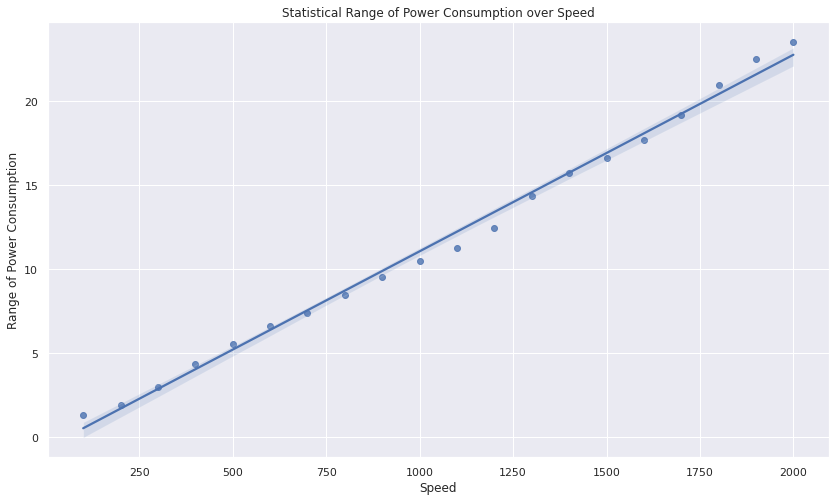

In [11]:
# drop time_steps columns
data_hor_disc.drop(columns=['time_steps'], inplace=True)
data_hor_cont.drop(columns=['time_steps'], inplace=True)


# DESCRIBE WHAT YOU ARE DOING WITH COMMENTS: IT'S THE BASICS
# list of horizontal continuous columns
columns_hor_cont = list(data_hor_cont.columns)
speeds_hor_cont = []
for speed in columns_hor_cont:
  speed = int(speed[4:])
  speeds_hor_cont.append(speed)
# print(speeds_hor_cont)

range_hor_cont = []
for label, content in data_hor_cont.items():
  range_hor_cont.append(abs(content.max() - content.min()))
# print(range_hor_cont)

sns.set(rc={'figure.figsize':(14,8)})
sns.regplot(x=speeds_hor_cont, y=range_hor_cont).set(xlabel="Speed", ylabel="Range of Power Consumption", title="Statistical Range of Power Consumption over Speed")

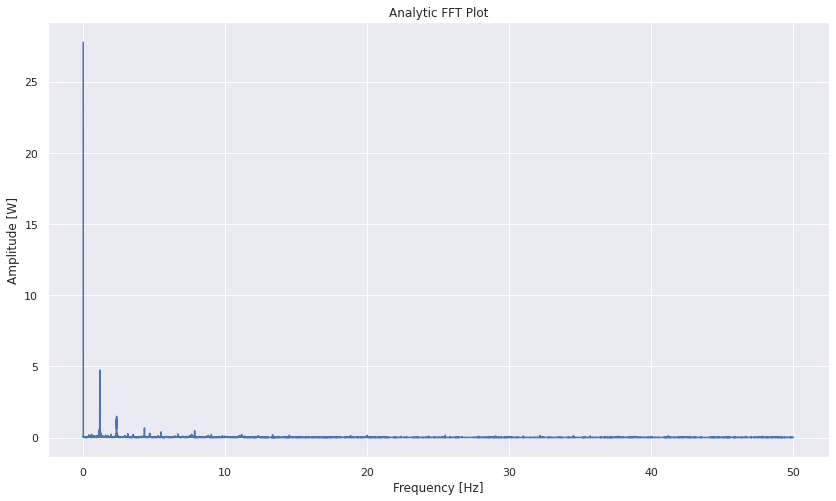

In [12]:
def fftPlot(sig, dt=None, plot=True):
    # Only half of the axis is required

    if dt is None:
        dt = 1
        t = np.arange(0, sig.shape[-1])
        xLabel = 'Samples'
    else:
        t = np.arange(0, sig.shape[-1]) * dt
        xLabel = 'Frequency [Hz]'

    if sig.shape[0] % 2 != 0:
        warnings.warn("signal preferred to be even in size, autoFixing it...")
        t = t[0:-1]
        sig = sig[0:-1]

    sigFFT = np.fft.fft(sig) / t.shape[0]  # Divided by size t for coherent magnitude

    freq = np.fft.fftfreq(t.shape[0], d=dt)

    # Plot analytic signal - right half of frequence axis needed only...
    firstNegInd = np.argmax(freq < 0)
    freqAxisPos = freq[0:firstNegInd]
    sigFFTPos = 2 * sigFFT[0:firstNegInd]  # *2 because of magnitude of analytic signal

    if plot:
        plt.figure()
        plt.plot(freqAxisPos, np.abs(sigFFTPos))
        plt.xlabel(xLabel)
        plt.ylabel('Amplitude [W]')
        plt.title('Analytic FFT Plot')
        plt.show()

    return sigFFTPos, freqAxisPos


if __name__ == "__main__":
    dt = 1 / 1000

    # Build a signal within Nyquist - the result will be the positive FFT with actual magnitude
    f0 = 200  # [Hz]
    t = np.arange(0, 1 + dt, dt)
    sig = (
        1 * np.sin(2 * np.pi * f0 * t)
        + 10 * np.sin(2 * np.pi * f0 / 2 * t)
        + 3 * np.sin(2 * np.pi * f0 / 4 * t)
        + 10 * np.sin(2 * np.pi * (f0 * 2 + 0.5) * t)  # <--- not sampled on grid so the peak will not be actual height
    )
    # Result in frequencies
    fftPlot(data_hor_cont.iloc[:, 19], dt=0.01)

## **data preparation** for LSTM model
---



In [13]:
# Splitting the data
# Required input data format: 3D array [samples, timesteps, features], features = 1 here
# Or 4D array [samples, subsequences, timesteps, features]
def train_val_test(dataset, train_split, valid_split):
  x = dataset.index.to_numpy()
  y = dataset.to_numpy()

  # Split the data in training and remaining dataset
  x_train, x_rem, y_train, y_rem = train_test_split(x,y, train_size=train_split, shuffle=False)

  # Split the remaining dataset into validation and testing
  x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, train_size=(valid_split/(1-train_split)), shuffle=False)

  return x_train, y_train, x_valid, y_valid, x_test, y_test

  # Reshaping to 4-dimensional array [samples, subsequences, timesteps, features]
  # x_train = x_train.reshape((dataset.size, len(dataset.columns), len(dataset), 1))

In [14]:
# Output of the splitting function
x_train, y_train, x_valid, y_valid, x_test, y_test = train_val_test(data_hor_cont, 0.6, 0.3)
print(x_train.shape, y_train.shape,
x_valid.shape, y_valid.shape,
x_test.shape, y_test.shape)
print(y_train)

(27000,) (27000, 20) (13499,) (13499, 20) (4501,) (4501, 20)
[[ 0.20999999  1.55700004  1.86000001 ... 18.05400085 20.28600121
  15.54800129]
 [ 0.20999999  1.55700004  1.86000001 ... 18.05400085 20.28600121
  15.54800129]
 [ 0.28599998  1.34100008  1.86000001 ... 18.05400085 20.28600121
  15.54800129]
 ...
 [ 1.04299998  1.58400011  2.148      ... 12.23999977 19.09600067
  16.06800079]
 [ 1.04299998  1.58400011  2.148      ... 12.23999977 19.09600067
  16.06800079]
 [ 1.04299998  1.58400011  2.148      ... 12.23999977 19.09600067
  16.06800079]]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


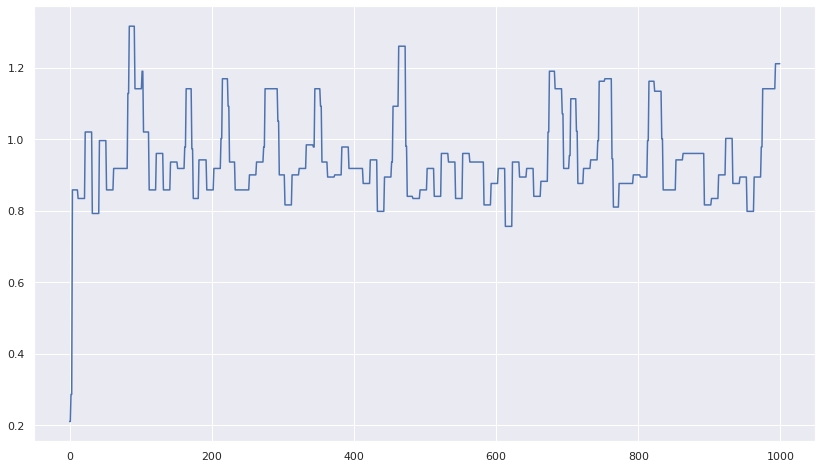

In [15]:
# Ploting part of the training dataset
sns.lineplot(x_train[:1000], y_train[:1000, 0])

In [33]:
### Vector Output CNN-LSTM Model
# Fitting the model
def model_fit(train, config):
  # Unpacking config
  n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
  n_input = n_seq * n_steps
  # Defining the model
  model = Sequential()
  model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(None,n_steps,1))))
  model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu')))
  model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(n_nodes, activation='relu'))
  model.add(Dense(n_nodes, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='adam')
  # Fitting the model
  model.fit(x_train, y_train, epochs=n_epochs, batch_size=n_batch, verbose=0)
  return model

# Forecasting with a pre-fit model
def model_predict(model, history, config):
  # Unpacking config
  n_seq, n_steps, _, _, _, _, _ = config
  n_input = n_seq * n_steps
  # Preparing data
  x_input = array(history[-n_input:]).reshape((1, n_seq, n_steps, 1))
  # Forecast
  yhat = model.predict(x_input, verbose=0)
  return yhat[0]

# Walk-forward validation
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  # split dataset
  train, test = train_test_split(data, n_test)
  # fit model
  model = model_fit(train, cfg)
  # seed history with training dataset
  history = [x for x in train]
  # step over each time-step in the test set
  for i in range(len(test)):
    # fit model and make forecast for history
    yhat = model_predict(model, history, cfg)
    # store forecast in list of predictions
    predictions.append(yhat)
    # add actual observation to history for the next loop
    history.append(test[i])
  # estimate prediction error
  error = sqrt(mean_squared_error(test, predictions))
  print(' > %.3f' % error)
  return error

In [30]:
### Multi-Head CNN-LSTM Model
# Defining the paramteres
#look_back = len(x_train)
#forecast_range = len(x_valid) + len(x_test)
#n_features = 1

# Defining the model
#input_layer = Input(shape=(look_back, n_features)) 
#head_list = []
#for i in range(0, n_features):
 #conv_layer_head = Conv1D(filters=4, kernel_size=7, activation='relu')(input_layer)
 #conv_layer_head_2 = Conv1D(filters=6, kernel_size=11, activation='relu')(conv_layer_head)
 #conv_layer_flatten = Flatten()(conv_layer_head_2)
 #head_list.append(conv_layer_flatten)
 
#concat_cnn = Concatenate(axis=1)(head_list)
#reshape = Reshape((head_list[0].shape[1], n_features))(concat_cnn)
#lstm = LSTM(100, activation='relu')(reshape)
#repeat = RepeatVector(forecast_range)(lstm)
#lstm_2 = LSTM(100, activation='relu', return_sequences=True)(repeat)
#dropout = Dropout(0.2)(lstm_2)
#dense = Dense(n_features, activation='linear')(dropout)
#multi_head_cnn_lstm_model = Model(inputs=input_layer, outputs=dense)

## LSTM **model fitting**
---



In [16]:
# run repeated experiment for parameters tuning
# need of refinement based on input
"""
def experiment(repeats, series, batch_size):
 # transform data to be stationary
 raw_values = series.values
 diff_values = difference(raw_values, 1)
 # transform data to be supervised learning
 supervised = timeseries_to_supervised(diff_values, 1)
 supervised_values = supervised.values
 # split data into train and test-sets
 train, test = supervised_values[0:-12], supervised_values[-12:]
 # transform the scale of the data
 scaler, train_scaled, test_scaled = scale(train, test)
 # run experiment
 error_scores = list()
 for r in range(repeats):
 # fit the model
 train_trimmed = train_scaled[2:, :]
 lstm_model = fit_lstm(train_trimmed, batch_size, 1000, 1)
 # forecast the entire training dataset to build up state for forecasting
 train_reshaped = train_trimmed[:, 0].reshape(len(train_trimmed), 1, 1)
 lstm_model.predict(train_reshaped, batch_size=batch_size)
 # forecast test dataset
 test_reshaped = test_scaled[:,0:-1]
 test_reshaped = test_reshaped.reshape(len(test_reshaped), 1, 1)
 output = lstm_model.predict(test_reshaped, batch_size=batch_size)
 predictions = list()
 for i in range(len(output)):
 yhat = output[i,0]
 X = test_scaled[i, 0:-1]
 # invert scaling
 yhat = invert_scale(scaler, X, yhat)
 # invert differencing
 yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
 # store forecast
 predictions.append(yhat)
 # report performance
 rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
 print('%d) Test RMSE: %.3f' % (r+1, rmse))
 error_scores.append(rmse)
 return error_scores

 # experiment
repeats = 30
results = DataFrame()
# vary training batches
batches = [1, 2, 4]
for b in batches:
 results[str(b)] = experiment(repeats, series, b)
# summarize results
print(results.describe())
# save boxplot
results.boxplot()
pyplot.savefig('boxplot_batches.png')
 """

"\ndef experiment(repeats, series, batch_size):\n # transform data to be stationary\n raw_values = series.values\n diff_values = difference(raw_values, 1)\n # transform data to be supervised learning\n supervised = timeseries_to_supervised(diff_values, 1)\n supervised_values = supervised.values\n # split data into train and test-sets\n train, test = supervised_values[0:-12], supervised_values[-12:]\n # transform the scale of the data\n scaler, train_scaled, test_scaled = scale(train, test)\n # run experiment\n error_scores = list()\n for r in range(repeats):\n # fit the model\n train_trimmed = train_scaled[2:, :]\n lstm_model = fit_lstm(train_trimmed, batch_size, 1000, 1)\n # forecast the entire training dataset to build up state for forecasting\n train_reshaped = train_trimmed[:, 0].reshape(len(train_trimmed), 1, 1)\n lstm_model.predict(train_reshaped, batch_size=batch_size)\n # forecast test dataset\n test_reshaped = test_scaled[:,0:-1]\n test_reshaped = test_reshaped.reshape(len(tes

## **evaluation** of model metrics and accuracy on test set
---



In [17]:
#sample of LSTM evaluation metrics
#model to be implementeds in previous cells
"""
model = Sequential()
model.add(LSTM(32, batch_size=BATCH_SIZE, input_shape=(train_x.shape[1],train_x.shape[2]), return_sequences=True, stateful=False ))#,,return_sequences=Tru# stateful=True 
model.add(Dense(2, activation='softmax'))
opt = tf.keras.optimizers.Adam(lr=0.01, decay=1e-6)

#Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

#Train model
model.fit(
    train_x, train_y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    shuffle=False,
    validation_data=(validation_x, validation_y)]
)
"""
#evaluate model against test/validation set
#score = model.evaluate(validation_x, validation_y, batch_size=BATCH_SIZE, verbose=0)

#print('Validation accuracy:', score[1])

"\nmodel = Sequential()\nmodel.add(LSTM(32, batch_size=BATCH_SIZE, input_shape=(train_x.shape[1],train_x.shape[2]), return_sequences=True, stateful=False ))#,,return_sequences=Tru# stateful=True \nmodel.add(Dense(2, activation='softmax'))\nopt = tf.keras.optimizers.Adam(lr=0.01, decay=1e-6)\n\n#Compile model\nmodel.compile(\n    loss='sparse_categorical_crossentropy',\n    optimizer=opt,\n    metrics=['accuracy']\n)\n\n#Train model\nmodel.fit(\n    train_x, train_y,\n    batch_size=BATCH_SIZE,\n    epochs=EPOCHS,\n    verbose=1,\n    shuffle=False,\n    validation_data=(validation_x, validation_y)]\n)\n"